In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df=df.dropna()

In [4]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
dtree=DecisionTreeRegressor(criterion="mse")

In [8]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [9]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [10]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.31937899631498556


In [11]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [12]:
score.mean()

0.0946947838821981

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [15]:
##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

### Model Evaluation

In [16]:
prediction=dtree.predict(X_test)

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

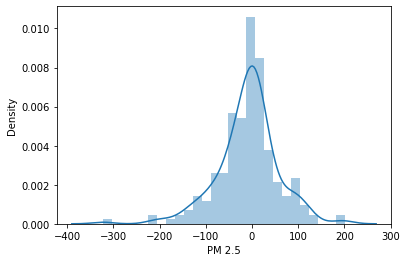

In [17]:
sns.distplot(y_test-prediction)

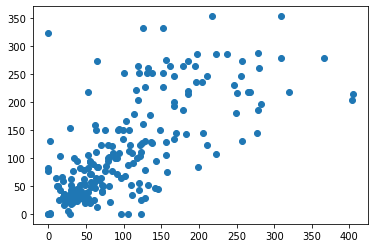

In [18]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning DEcision Tree Regressor

In [19]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [20]:
# Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [21]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [22]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [23]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 7312 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 11920 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 17552 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 24208 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 31888 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 40592 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 50320 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 61072 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 72848 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 85648 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 99472 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 10240


 Time taken: 0 hours 4 minutes and 38.57 seconds.


In [24]:
random_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [25]:
random_search.best_score_

-2990.552736763919

In [26]:
predictions=random_search.predict(X_test)

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

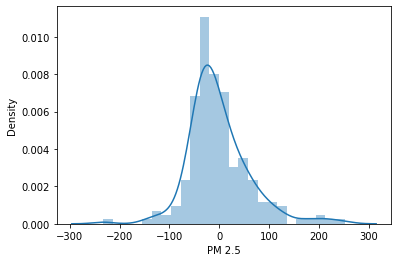

In [27]:
sns.distplot(y_test-predictions)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

NameError: name 'metrics' is not defined

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 46.10026636225266
MSE: 4443.198617928716
RMSE: 66.65732231292161


In [31]:
import pickle

In [32]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)